In [1]:
from nilearn import datasets
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nilearn import plotting
from nilearn.plotting import plot_glass_brain

In [ ]:
nifti_img = nb.load('AAL3_1mm.nii.gz')
# Obtener los datos de la imagen
data = nifti_img.get_fdata()

# Definir las etiquetas y los valores deseados
labels_lobulo_frontal = [2, 3, 7, 13, 16, 17, 18, 19, 24, 25]
value_lobulo_frontal = 5

labels_lobulo_limbico = [38, 39, 40, 41]
value_lobulo_limbico = 10

labels_lobulo_parietal = [62, 63, 64, 65, 66, 67, 68, 69, 70, 71]
value_lobulo_parietal = 15

labels_lobulo_temporal = [82, 83, 86, 87, 90, 91]
value_lobulo_temporal = 25

labels_lobulo_occipital = [46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
value_lobulo_occipital = 35


# Asignar valores a la primera región (5, 6)
target_voxels_1 = np.isin(data, labels_lobulo_frontal)
data[target_voxels_1] = value_lobulo_frontal

# Asignar valores a la segunda región (9, 10)
target_voxels_2 = np.isin(data, labels_lobulo_parietal)
data[target_voxels_2] = value_lobulo_parietal

# Asignar valores a la primera región (5, 6)
target_voxels_3 = np.isin(data, labels_lobulo_temporal)
data[target_voxels_3] = value_lobulo_temporal

# Asignar valores a la segunda región (9, 10)
target_voxels_4 = np.isin(data, labels_lobulo_occipital)
data[target_voxels_4] = value_lobulo_occipital


# Establecer el resto de los voxeles a 0
data[~(target_voxels_1 | target_voxels_2 | target_voxels_3 | target_voxels_4 )] = 0

# Crear la nueva imagen NIfTI
new_nifti_img = nb.Nifti1Image(data, nifti_img.affine)

# Guardar la nueva imagen en formato .nii.gz
nb.save(new_nifti_img, 'congruente_vs_incongruente_rel.nii.gz')

In [ ]:
import nibabel as nb
import numpy as np

nifti_img = nb.load('AAL3_1mm.nii.gz')
data = nifti_img.get_fdata()

# Diccionario con etiquetas por lóbulo y valor base para cada lóbulo (color base)
lobulos_labels = {
    "frontal": {
        "labels": [2, 3, 7, 13, 16, 17, 18, 19, 24, 25],
        "base_value": 2
    },
    "limbico": {
        "labels": [38, 39, 40, 41],
        "base_value": 32
    },
    "parietal": {
        "labels": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71],
        "base_value": 62
    },
    "temporal": {
        "labels": [82, 83, 86, 87, 90, 91],
        "base_value": 92
    },
    "occipital": {
        "labels": [46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        "base_value": 122
    }
}

mask_total = np.zeros(data.shape, dtype=bool)

for lobulo, info in lobulos_labels.items():
    labels = info["labels"]
    base = info["base_value"]
    for i, label in enumerate(labels):
        val = base + i * 3
        target_voxels = (data == label)
        data[target_voxels] = val
        mask_total |= target_voxels

# Poner a 0 el resto de los voxeles no asignados
data[~mask_total] = 0

new_nifti_img = nb.Nifti1Image(data, nifti_img.affine)
nb.save(new_nifti_img, 'congruente_vs_incongruente_rel.nii.gz')


In [8]:
import nibabel as nb
import numpy as np

nifti_img = nb.load('AAL3_1mm.nii.gz')
data = nifti_img.get_fdata()

lobulos_labels = {
    "frontal": {
        "labels": [2, 3, 7, 13, 16, 17, 18, 19, 24, 25],
        "values": [2, 5, 8, 11, 14, 17, 20, 23, 26, 29]
    },
    "limbico": {
        "labels": [38, 39, 40, 41],
        "values": [32, 35, 38, 41]
    },
    "parietal": {
        "labels": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71],
        "values": [44, 47, 50, 53, 56, 59, 62, 65, 68, 71]
    },
    "temporal": {
        "labels": [82, 83, 86, 87, 90, 91],
        "values": [74, 77, 80, 83, 86, 89]
    },
    "occipital": {
        "labels": [46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        "values": [92, 95, 98, 101, 104, 107, 110, 113, 116, 119, 122, 125, 128, 131]
    }
}

mask_total = np.zeros(data.shape, dtype=bool)

for lobulo, info in lobulos_labels.items():
    labels = info["labels"]
    values = info["values"]
    for label, val in zip(labels, values):
        target_voxels = (data == label)
        data[target_voxels] = val
        mask_total |= target_voxels

data[~mask_total] = 0

new_nifti_img = nb.Nifti1Image(data, nifti_img.affine)
nb.save(new_nifti_img, 'congruente_vs_incongruente_rel_explicit_values.nii.gz')


In [6]:
data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
nifti_img = nb.load('AAL3_1mm.nii.gz')
# Obtener los datos de la imagen
data = nifti_img.get_fdata()

# Definir las etiquetas y los valores deseados

labels_lobulo_occipital = [45, 46, 49, 50]
value_lobulo_occipital = 35


# Asignar valores a la primera región (5, 6)


# Asignar valores a la segunda región (9, 10)
target_voxels_1 = np.isin(data, labels_lobulo_occipital)
data[target_voxels_1] = value_lobulo_occipital


# Establecer el resto de los voxeles a 0
data[~(target_voxels_1 )] = 0

# Crear la nueva imagen NIfTI
new_nifti_img = nb.Nifti1Image(data, nifti_img.affine)

# Guardar la nueva imagen en formato .nii.gz
nb.save(new_nifti_img, 'congruente_vs_incongruente_norel.nii.gz')

In [ ]:
nifti_img = nb.load('AAL3_1mm.nii.gz')
# Obtener los datos de la imagen
data = nifti_img.get_fdata()

# Definir las etiquetas y los valores deseados
labels_lobulo_frontal = [18, 19]
value_lobulo_frontal = 35

labels_lobulo_limbico = [40, 41, 42, 43]
value_lobulo_limbico = 35

labels_lobulo_parietal = [66, 67]
value_lobulo_parietal = 35


labels_lobulo_temporal = [90, 91]
value_lobulo_temporal = 35

labels_lobulo_occipital = [46, 47, 48, 49, 50, 51, 52, 53, 60, 61]
value_lobulo_occipital = 35





# Asignar valores a la primera región (5, 6)


# Asignar valores a la segunda región (9, 10)
target_voxels_1 = np.isin(data, labels_lobulo_occipital)
data[target_voxels_1] = value_lobulo_occipital


# Establecer el resto de los voxeles a 0
data[~(target_voxels_1 )] = 0

# Crear la nueva imagen NIfTI
new_nifti_img = nb.Nifti1Image(data, nifti_img.affine)

# Guardar la nueva imagen en formato .nii.gz
nb.save(new_nifti_img, 'congruente_vs_incongruente_norel.nii.gz')

In [9]:
import nibabel as nb
import numpy as np

nifti_img = nb.load('AAL3_1mm.nii.gz')
data = nifti_img.get_fdata()

lobulos_labels = {
    "frontal": {
        "labels": [18, 19],
        "values": [2, 5]
    },
    "limbico": {
        "labels": [40, 41, 42, 43],
        "values": [7, 9, 11, 14]
    },
    "parietal": {
        "labels": [66, 67],
        "values": [17, 20]
    },
    "temporal": {
        "labels": [90, 91],
        "values": [23, 26]
    },
    "occipital": {
        "labels": [46, 47, 48, 49, 50, 51, 52, 53, 60, 61],
        "values": [29, 32, 35, 38, 41, 44, 47, 50, 53, 56]
    }
}

mask_total = np.zeros(data.shape, dtype=bool)

for lobulo, info in lobulos_labels.items():
    labels = info["labels"]
    values = info["values"]
    for label, val in zip(labels, values):
        target_voxels = (data == label)
        data[target_voxels] = val
        mask_total |= target_voxels

data[~mask_total] = 0

new_nifti_img = nb.Nifti1Image(data, nifti_img.affine)
nb.save(new_nifti_img, 'congruente_vs_incongruente_no_rel_explicit_values.nii.gz')


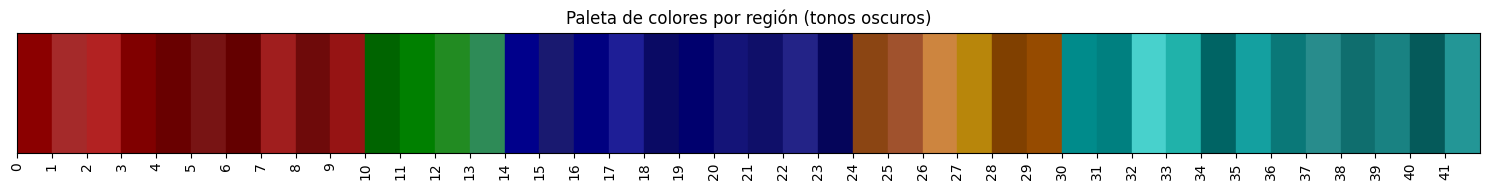

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Lista de colores en formato RGB (0-255) de tu paleta
colors_rgb = [
    [139, 0, 0], [165, 42, 42], [178, 34, 34], [128, 0, 0], [105, 0, 0],
    [120, 20, 20], [100, 0, 0], [160, 30, 30], [110, 10, 10], [150, 20, 20],
    [0, 100, 0], [0, 128, 0], [34, 139, 34], [46, 139, 87],
    [0, 0, 139], [25, 25, 112], [0, 0, 128], [30, 30, 150], [10, 10, 100],
    [0, 0, 110], [20, 20, 120], [15, 15, 105], [35, 35, 135], [5, 5, 90],
    [139, 69, 19], [160, 82, 45], [205, 133, 63], [184, 134, 11],
    [128, 64, 0], [150, 75, 0],
    [0, 139, 139], [0, 128, 128], [72, 209, 204], [32, 178, 170],
    [0, 100, 100], [20, 160, 160], [10, 120, 120], [40, 140, 140],
    [15, 110, 110], [25, 130, 130], [5, 90, 90], [35, 150, 150]
]

# Normalizar a 0-1 para matplotlib
colors_rgb = np.array(colors_rgb) / 255.0

# Configurar figura
fig, ax = plt.subplots(figsize=(15, 2))
for idx, color in enumerate(colors_rgb):
    ax.add_patch(plt.Rectangle((idx, 0), 1, 1, color=color))

# Ajustes de ejes
ax.set_xlim(0, len(colors_rgb))
ax.set_ylim(0, 1)
ax.set_xticks(np.arange(len(colors_rgb)))
ax.set_yticks([])
ax.set_xticklabels([str(i) for i in range(len(colors_rgb))], rotation=90)
ax.set_title("Paleta de colores por región (tonos oscuros)", fontsize=12)
plt.tight_layout()
plt.show()


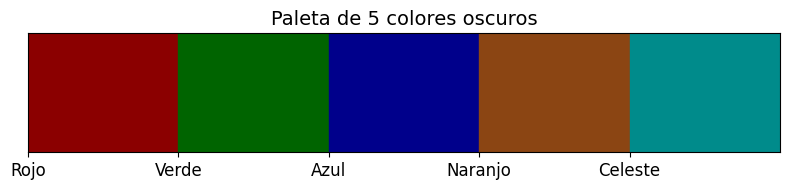

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Paleta de colores en formato [R, G, B] normalizado (0–1)
colors_rgb = [
    [0.545, 0.000, 0.000],   # rojo oscuro
    [0.000, 0.392, 0.000],   # verde oscuro
    [0.000, 0.000, 0.545],   # azul oscuro
    [0.545, 0.271, 0.075],   # naranjo oscuro
    [0.000, 0.545, 0.545],   # celeste oscuro
]

# Mostrar los colores como bloques
fig, ax = plt.subplots(figsize=(8, 2))
for i, color in enumerate(colors_rgb):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))

ax.set_xlim(0, len(colors_rgb))
ax.set_ylim(0, 1)
ax.set_xticks(range(len(colors_rgb)))
ax.set_yticks([])
ax.set_xticklabels(['Rojo', 'Verde', 'Azul', 'Naranjo', 'Celeste'], fontsize=12)
ax.set_title("Paleta de 5 colores oscuros", fontsize=14)
plt.tight_layout()
plt.show()


### Read AAL atlas

In [2]:
# Cingulate
nifti_img = nb.load('AAL3_1mm.nii.gz')

# Obtener los datos de la imagen
data = nifti_img.get_fdata()

# Definir etiquetas objetivo y valor deseado
labels_cing = [5,6]
desired_value = 10

target_voxels = np.isin(data, labels_cing)

data[target_voxels] = desired_value
data[~target_voxels] = 0
new_nifti_img = nb.Nifti1Image(data, nifti_img.affine)

# Guardar la nueva imagen en formato .nii.gz
nb.save(new_nifti_img, 'MFG.nii.gz')

# Extraccion multiple

In [2]:
import nibabel as nb
import numpy as np

### Read AAL atlas

# Cingulate y otra región adicional
nifti_img = nb.load('C:/Users/felipe/Documents/Brain/cerebros/AAL3_1mm.nii.gz')

# Obtener los datos de la imagen
data = nifti_img.get_fdata()

# Definir etiquetas objetivo y valor deseado
labels_cing = [5, 6, 9, 10]
desired_value = 10

target_voxels = np.isin(data, labels_cing)

data[target_voxels] = desired_value
data[~target_voxels] = 0
new_nifti_img = nb.Nifti1Image(data, nifti_img.affine)

# Guardar la nueva imagen en formato .nii.gz
nb.save(new_nifti_img, 'prueba1.nii.gz')


In [5]:
import nibabel as nb
import numpy as np

### Read AAL atlas

# Cingulate y otra región adicional
nifti_img = nb.load('C:/Users/felipe/Documents/Brain/cerebros/AAL3_1mm.nii.gz')

# Obtener los datos de la imagen
data = nifti_img.get_fdata()

# Definir etiquetas objetivo y valor deseado
labels_cing = [5, 6, 51, 52]
desired_value = 20

target_voxels = np.isin(data, labels_cing)

data[target_voxels] = desired_value
data[~target_voxels] = 0
new_nifti_img = nb.Nifti1Image(data, nifti_img.affine)

# Guardar la nueva imagen en formato .nii.gz
nb.save(new_nifti_img, 'prueba2.nii.gz')


In [6]:
import nibabel as nb
import numpy as np

### Read AAL atlas

# Cargar el atlas AAL
nifti_img = nb.load('C:/Users/felipe/Documents/Brain/cerebros/AAL3_1mm.nii.gz')

# Obtener los datos de la imagen
data = nifti_img.get_fdata()

# Definir las etiquetas y los valores deseados
labels_cing_1 = [5, 6]
value_cing_1 = 10

labels_cing_2 = [51, 52]
value_cing_2 = 20

# Asignar valores a la primera región (5, 6)
target_voxels_1 = np.isin(data, labels_cing_1)
data[target_voxels_1] = value_cing_1

# Asignar valores a la segunda región (9, 10)
target_voxels_2 = np.isin(data, labels_cing_2)
data[target_voxels_2] = value_cing_2

# Establecer el resto de los voxeles a 0
data[~(target_voxels_1 | target_voxels_2)] = 0

# Crear la nueva imagen NIfTI
new_nifti_img = nb.Nifti1Image(data, nifti_img.affine)

# Guardar la nueva imagen en formato .nii.gz
nb.save(new_nifti_img, 'prueba3.nii.gz')


In [8]:
import nibabel as nb
import numpy as np

### Read AAL atlas

# Cargar el atlas AAL
nifti_img = nb.load('C:/Users/felipe/Documents/Brain/cerebros/AAL3_1mm.nii.gz')

# Obtener los datos de la imagen
data = nifti_img.get_fdata()

# Definir las etiquetas y los valores deseados
labels_occ_right = [52, 54,56]
value_occ_right = 100

labels_cing_right = [36, 38]
value_cing_right = 91

labels_occ_left = [51, 53, 55]
value_occ_left = 86

labels_hpc_left = [39]
value_hpc_left = 47

labels_pariet_right = [62, 64]
value_pariet_right = 45

labels_pariet_left = [61, 63]
value_pariet_left = 45

labels_cing_left = [35, 37]
value_cing_left = 12

labels_hpc_right = [40]
value_hpc_right = 11



# Asignar valores a la primera región (5, 6)
target_voxels_1 = np.isin(data, labels_occ_right)
data[target_voxels_1] = value_occ_right

# Asignar valores a la segunda región (9, 10)
target_voxels_2 = np.isin(data, labels_cing_right)
data[target_voxels_2] = value_cing_right

# Asignar valores a la primera región (5, 6)
target_voxels_3 = np.isin(data, labels_occ_left)
data[target_voxels_3] = value_occ_left

# Asignar valores a la segunda región (9, 10)
target_voxels_4 = np.isin(data, labels_hpc_left)
data[target_voxels_4] = value_hpc_left

# Asignar valores a la primera región (5, 6)
target_voxels_5 = np.isin(data, labels_pariet_right)
data[target_voxels_5] = value_pariet_right

# Asignar valores a la segunda región (9, 10)
target_voxels_6 = np.isin(data, labels_pariet_right)
data[target_voxels_6] = value_pariet_right

# Asignar valores a la primera región (5, 6)
target_voxels_7 = np.isin(data, labels_cing_left)
data[target_voxels_7] = value_cing_left

# Asignar valores a la segunda región (9, 10)
target_voxels_8 = np.isin(data, labels_hpc_right)
data[target_voxels_8] = value_hpc_right



# Establecer el resto de los voxeles a 0
data[~(target_voxels_1 | target_voxels_2 | target_voxels_3 | target_voxels_4 | target_voxels_5 | target_voxels_6 | target_voxels_7 | target_voxels_8 )] = 0

# Crear la nueva imagen NIfTI
new_nifti_img = nb.Nifti1Image(data, nifti_img.affine)

# Guardar la nueva imagen en formato .nii.gz
nb.save(new_nifti_img, 'xgboost_region.nii.gz')
